In [1]:
#Step 1: Data Exploration & Visualization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
train_data = pd.read_csv('/content/TrainData.csv')
test_data = pd.read_csv('/content/TestData.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [4]:
train_data.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
2,3,0,?,renault,gas,std,four,wagon,fwd,front,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [6]:
train_data.describe()

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,0.850829,98.729282,174.174033,65.943646,53.709945,2564.165746,127.900552,10.154254,25.132597,30.646409,13271.314917
std,52.394338,1.267045,6.116197,12.336569,2.146114,2.497735,523.489016,42.578438,3.982306,6.418211,6.888545,8106.479635
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,46.000000,0.000000,94.500000,166.800000,64.200000,51.600000,2190.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,91.000000,1.000000,96.900000,173.200000,65.500000,54.100000,2420.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,136.000000,2.000000,102.400000,183.100000,66.600000,55.500000,2935.000000,146.000000,9.400000,30.000000,34.000000,16500.000000
max,181.000000,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [7]:
numerical_cols=train_data.select_dtypes(exclude=['object']).columns

In [8]:
train_data[numerical_cols].head(2)

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,1,-1,102.4,175.6,66.5,53.9,2458,122,8.7,27,32,11248
1,2,0,101.2,176.8,64.8,54.3,2710,164,9.0,21,28,20970


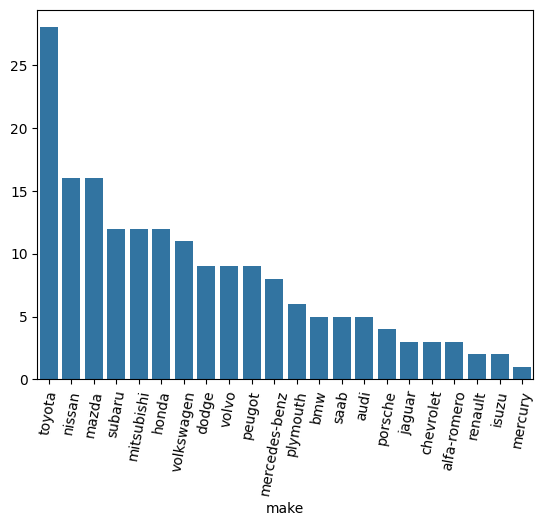

In [11]:
# Calculate the counts of each 'make'
make_counts = train_data['make'].value_counts()

# Create the bar plot using the calculated counts
plot = sns.barplot(x=make_counts.index, y=make_counts.values)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

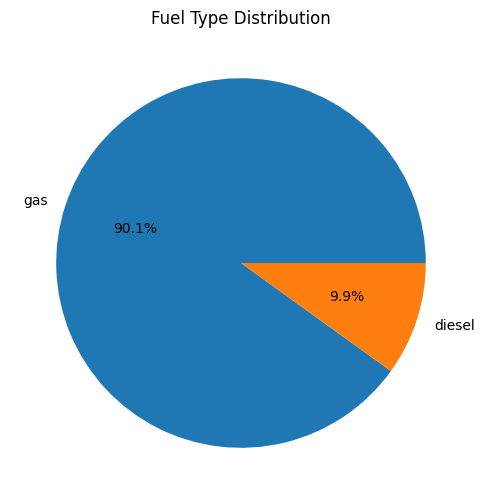

In [15]:
# Calculate the counts of each fuel type
fuel_type_counts = train_data['fuel-type'].value_counts()

# Create the pie plot using the calculated counts and labels
plot = fuel_type_counts.plot.pie(figsize=(15, 6), autopct='%1.1f%%')
plt.title('Fuel Type Distribution') # Add a title to the chart for clarity
plt.ylabel('') # Remove the y-axis label as it's redundant in a pie chart
plt.show() # Display the chart

<ipython-input-17-4aa2aba0a69f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['price'],kde=True)


<Axes: xlabel='price', ylabel='Density'>

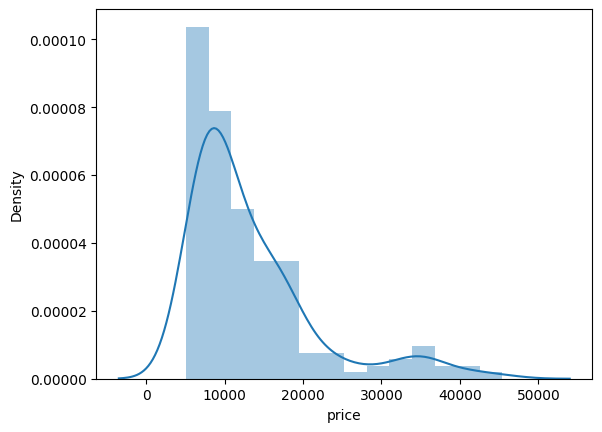

In [17]:
sns.distplot(train_data['price'],kde=True)

<ipython-input-25-b06676d1c15c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel-type', y='price', data=train_data, palette='Pastel2')


<Axes: xlabel='fuel-type', ylabel='price'>

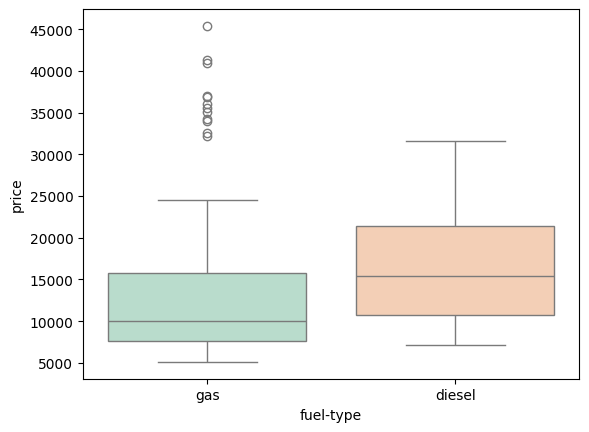

In [25]:
sns.boxplot(x='fuel-type', y='price', data=train_data, palette='Pastel2')

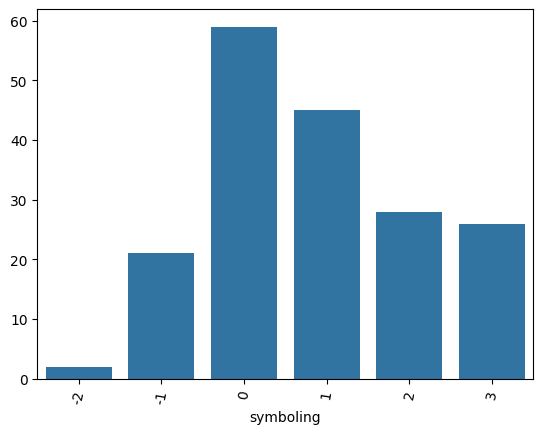

In [27]:
# Calculate the counts of each 'symboling'
symboling_counts = train_data['symboling'].value_counts()

# Create the bar plot using the calculated counts
plot = sns.barplot(x=symboling_counts.index, y=symboling_counts.values)
plot=plt.setp(plot.get_xticklabels(), rotation=80)
# You may or may not need to rotate x-axis labels, depending on your data


In [32]:
train_data[numerical_cols].corr()

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
ID,1.000000,0.052638,-0.084446,-0.091683,-0.076285,0.003829,-0.076160,-0.023187,-0.092492,0.036065,0.031355,-0.077212
symboling,0.052638,1.000000,-0.539899,-0.362990,-0.234588,-0.561800,-0.210204,-0.091515,-0.214388,-0.072019,0.004107,-0.066371
wheel-base,-0.084446,-0.539899,1.000000,0.877961,0.815036,0.578566,0.774955,0.579191,0.304590,-0.442506,-0.524048,0.581442
length,-0.091683,-0.362990,0.877961,1.000000,0.862058,0.471316,0.878766,0.695723,0.203150,-0.653464,-0.691230,0.691308
width,-0.076285,-0.234588,0.815036,0.862058,1.000000,0.285551,0.863686,0.737332,0.223176,-0.626472,-0.675939,0.761151
height,0.003829,-0.561800,0.578566,0.471316,0.285551,1.000000,0.279012,0.059055,0.288664,-0.012039,-0.072864,0.112378
curb-weight,-0.076160,-0.210204,0.774955,0.878766,0.863686,0.279012,1.000000,0.856436,0.195679,-0.741260,-0.788780,0.836385
engine-size,-0.023187,-0.091515,0.579191,0.695723,0.737332,0.059055,0.856436,1.000000,0.050838,-0.647462,-0.679148,0.870330
compression-ratio,-0.092492,-0.214388,0.304590,0.203150,0.223176,0.288664,0.195679,0.050838,1.000000,0.300712,0.242707,0.104885
city-mpg,0.036065,-0.072019,-0.442506,-0.653464,-0.626472,-0.012039,-0.741260,-0.647462,0.300712,1.000000,0.972393,-0.675868
